## EDA

- load data, sample from big dataset to obtain raw samples dataset.
- get basic metrics from de df: shape, row count, column names.
- get value counts for the target and all the categorical features.
- analyse if there are missing values.
- drop rows with missing values.
- get distribution plots for the continous variables.
- get a matrix showing the means and frequencie of different categoricals for each category of the target.
- plot heatmap of correlations between features (with seaborn).
- plot pairwise correlation between features and the target.


## Getting and sampling the data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [57]:
#My first approach was to load the dataset, but I run into a surprise: Dataset is heavy, and it takes A LOT of time to load 
EXPEDIA_FOLDER = "/Users/veronicabianchini/Documents/GA-Data Science/Expedia Project/"
raw_data = pd.read_csv(EXPEDIA_FOLDER +"train.csv")

In [5]:
raw_data.head()
raw_data.shape

(37670293, 24)

To work more easily with it, I decided to create a sample. 
To select the data in the most random way possible, I used a loop that takes chunks of data and selects one to add to a sample.

In [3]:
#Iterate over chunks of the data set
## Choose model that can be trained incrementally
## model.fit_partial 

In [94]:
count = 0
sampled_df = pd.DataFrame()
for df in pd.read_csv(EXPEDIA_FOLDER + 'train.csv', chunksize= 10000):
    count += 1
    #print df.head(3)
    #print len(df['hotel_cluster'].value_counts())
    sampled_df = sampled_df.append(df.sample(100))
    if count >3000:
        break


In [99]:
#I end up with a sample of little over 300,000 cases. All the clusters are comprehended in this sample
print sample.shape    
print len(sample['hotel_cluster'].value_counts())

(300100, 24)
100


Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


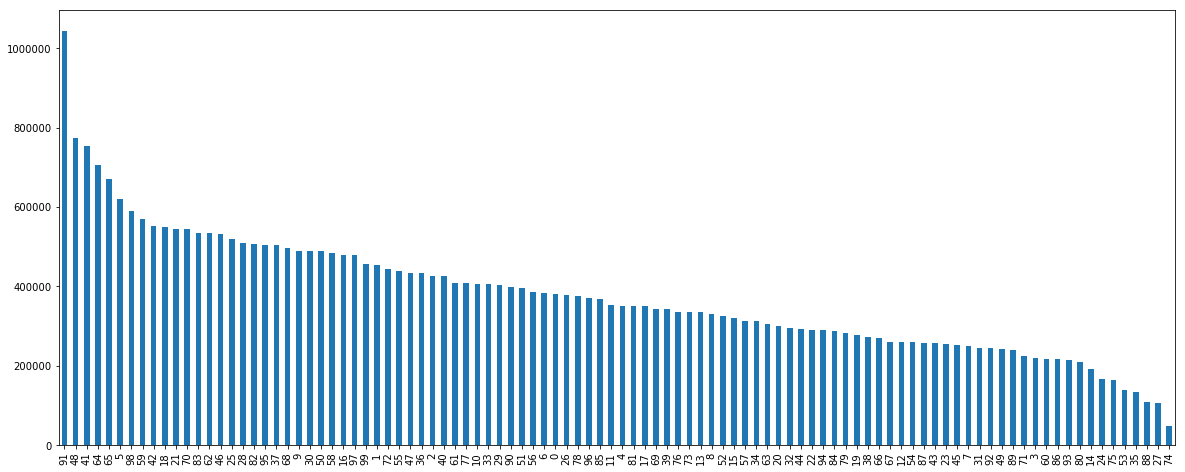

In [62]:
#Do I have different distributions of hotel clusters vs original data?
raw_data['hotel_cluster'].value_counts().plot(kind='bar', figsize=(20,8)) #raw data outcome distribution

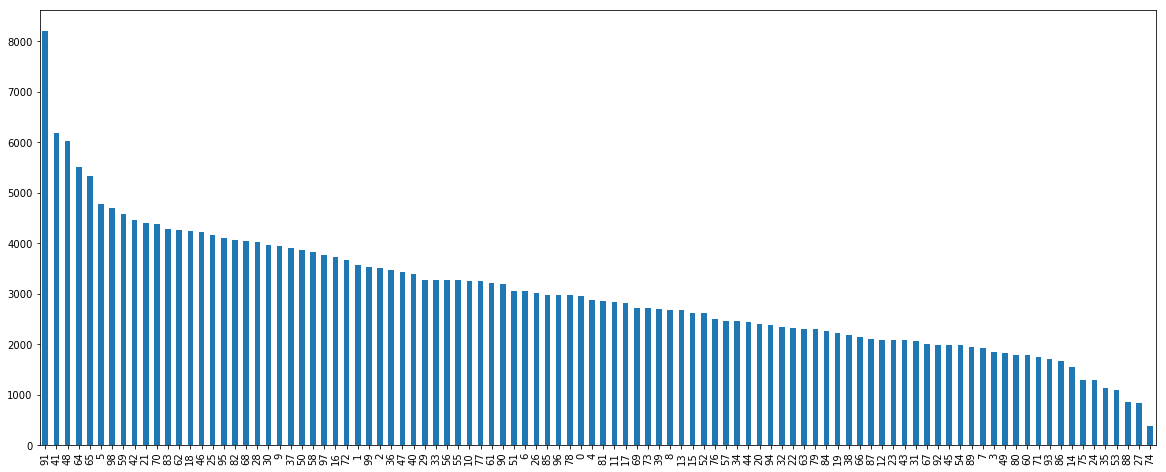

In [100]:
sample['hotel_cluster'].value_counts().plot(kind='bar', figsize=(20,8)) #sample outcome distribution

The distribution of the outcome is fairly similar between raw data and sample. 
Now that I´m happy with the sample, I want to save it as a cvs file to access it confortably

In [95]:
from datetime import datetime

In [96]:
sampled_df.to_csv(EXPEDIA_FOLDER + "sampled_df_" + datetime.now().strftime("%Y-%m-%d-%H-%M-%S") + ".csv")

In [204]:
sample = pd.read_csv(EXPEDIA_FOLDER+"sampled_df_2017-05-06-13-59-14.csv")

# Exploratory Data Analysis

### Basic Stats

In [232]:
print sample.shape    
print len(sample['hotel_cluster'].value_counts())

(191385, 25)
100


Description of my variables (capture from Kaggle)

![alt text](Expedia_data_features.png "Data Features")

In [264]:
sample.dtypes

Unnamed: 0                     int64
date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [262]:
sample[sample.columns[:12]].describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel
count,1.913850e+05,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000,1.913850e+05,191385.000000,191385.000000,191385.000000
mean,1.501269e+07,6.167040,2.899799,87.491428,311.383902,28073.287927,1975.815127,5.962206e+05,0.135209,0.243995,6.003250
std,8.653702e+06,8.950358,0.543702,54.253243,144.274801,16540.887698,2240.221553,3.428949e+05,0.341948,0.429491,3.729568
min,8.600000e+01,2.000000,0.000000,0.000000,135.000000,0.000000,0.005600,6.000000e+00,0.000000,0.000000,0.000000
25%,7.504040e+06,2.000000,3.000000,66.000000,174.000000,14703.000000,312.811000,3.001540e+05,0.000000,0.000000,2.000000
50%,1.505119e+07,2.000000,3.000000,66.000000,321.000000,27655.000000,1138.484900,5.929880e+05,0.000000,0.000000,9.000000
75%,2.247538e+07,2.000000,3.000000,66.000000,363.000000,43026.000000,2558.644200,8.930450e+05,0.000000,0.000000,9.000000
max,3.000999e+07,53.000000,4.000000,215.000000,1021.000000,56507.000000,12404.419600,1.198737e+06,1.000000,1.000000,10.000000


In [263]:
sample[sample.columns[12:]].describe()

,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000,191385.000000
mean,2.038059,0.348591,1.103383,14411.504517,2.633106,0.082013,1.474217,2.900274,74.063202,619.454989,49.881454
std,0.899657,0.754381,0.429693,10822.718743,2.169681,0.274385,1.194646,1.497672,53.673051,475.687802,29.136224
min,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,245.000000,25.000000
50%,2.000000,0.000000,1.000000,11320.000000,1.000000,0.000000,1.000000,2.000000,50.000000,628.000000,49.000000
75%,2.000000,0.000000,1.000000,17859.000000,5.000000,0.000000,2.000000,4.000000,77.000000,701.000000,73.000000
max,9.000000,9.000000,8.000000,65047.000000,9.000000,1.000000,43.000000,6.000000,212.000000,2117.000000,99.000000


### Missing values

In [112]:
#How many rows do I have with at least one missing value?
sum(sample.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

108715

In [188]:
#Should I drop these rows? First I need to know more about the NaN: where are they located? I realise that only some columns have missiong values:
# 1) orig_destination_distance: the distance between place of search & destination
# 2) check in and out dates in the search
sample.apply(lambda x: sum(x.isnull().values), axis = 0) 

Unnamed: 0                        0
date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    108482
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                         397
srch_co                         397
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

In [292]:
#Next step: for now, I'm dropping the NaN. I can consider more sophisticated solutions later
sample.dropna(inplace=True)

In [293]:
#check null values are dropped:
sample.apply(lambda x: sum(x.isnull()), axis = 0) 

Unnamed: 0                   0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
dtype: int64

In [297]:
sample.shape

(191385, 25)

### Digging further into the data

### Distributions

Following step is to understand more about these features: how are they shaped? 
Are there any outlier points I should be aware of?
I'll plot them to find out.

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

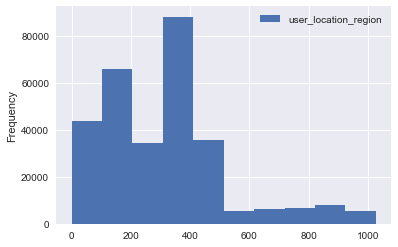

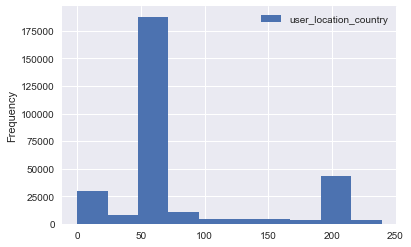

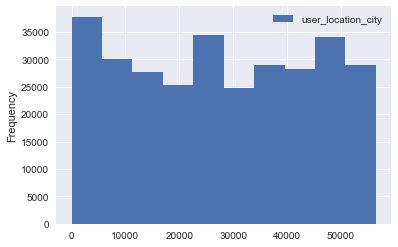

In [179]:
sample.plot(kind='hist',y='user_location_region')
sample.plot(kind='hist',y='user_location_country')
sample.plot(kind='hist',y='user_location_city')
plt.show()
#These features are not as similar as I thought initially. It won't be possible to use one instead of the others without making assuptions

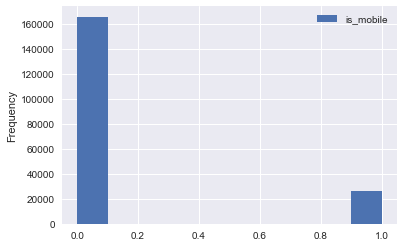

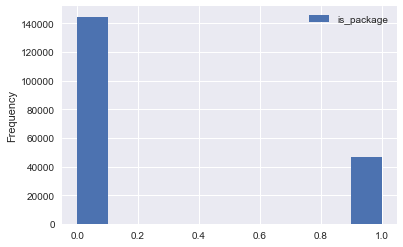

In [265]:
sample.plot(kind='hist',y='is_mobile')
sample.plot(kind='hist',y='is_package')

plt.show()
#most users don't use expedia through their phones, ans don't buy packages

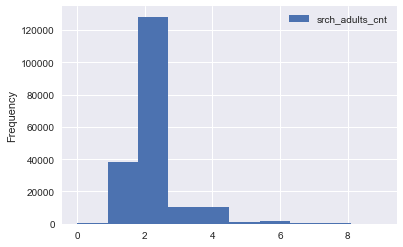

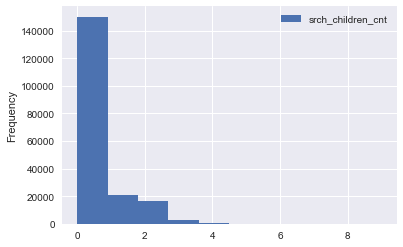

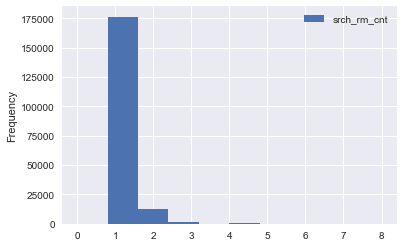

In [266]:
sample.plot(kind='hist',y='srch_adults_cnt')
sample.plot(kind='hist',y='srch_children_cnt')
sample.plot(kind='hist',y='srch_rm_cnt')
plt.show()


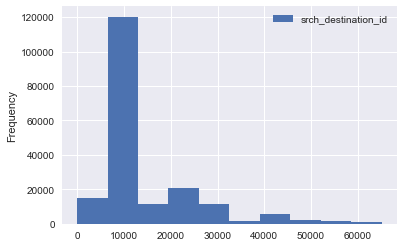

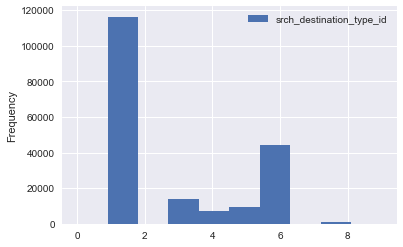

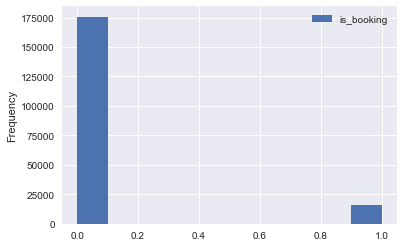

In [273]:
sample.plot(kind='hist',y='srch_destination_id')
    sample.plot(kind='hist',y='srch_destination_type_id')
sample.plot(kind='hist',y='is_booking')
#surprised about how many searches end up in no bookings!!

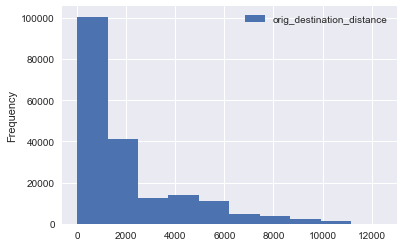

In [274]:
sample.plot(kind='hist',y='orig_destination_distance')
plt.show()
#a lot of missing values...

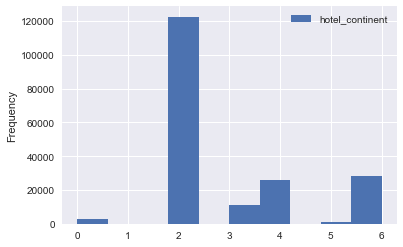

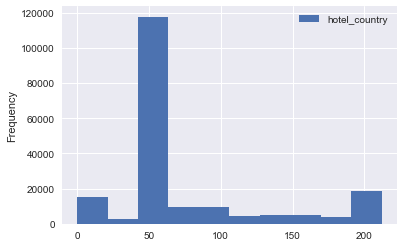

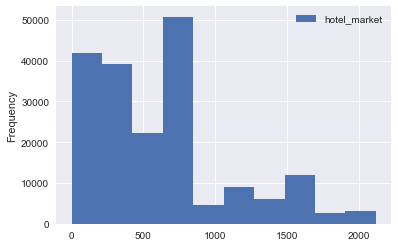

In [268]:
sample.plot(kind='hist',y='hotel_continent')
sample.plot(kind='hist',y='hotel_country')
sample.plot(kind='hist',y='hotel_market')
plt.show()

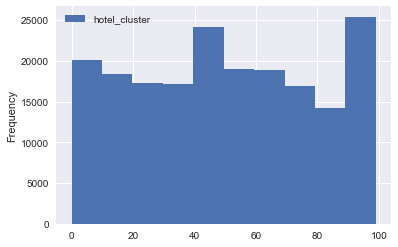

In [269]:
sample.plot(kind='hist',y='hotel_cluster')
plt.show()
#finally, my target variable! Pretty even distribution

I'm not plotting any dates yet. I will analyse them in more detail in my next steps, since I've discover some issues that need fixing first (e.g. I think some dates are in US m/d/y format, and others in regular d/m/y)

### Correlation Matrix

In [279]:
correlations=sample.corr()
print correlations
#Hard to see! what about a heatmap?

                           Unnamed: 0  site_name  posa_continent  \
Unnamed: 0                   1.000000   0.002035       -0.000426   
site_name                    0.002035   1.000000       -0.348621   
posa_continent              -0.000426  -0.348621        1.000000   
user_location_country       -0.003926   0.541877        0.112118   
user_location_region        -0.000621   0.017489        0.100468   
user_location_city           0.004337   0.047594       -0.014919   
orig_destination_distance    0.000568   0.030306        0.047572   
user_id                      0.004325  -0.005322       -0.000252   
is_mobile                    0.001191  -0.009444        0.022087   
is_package                  -0.000263  -0.000550       -0.049337   
channel                     -0.003547   0.098933        0.028374   
srch_adults_cnt             -0.002744   0.023034       -0.018279   
srch_children_cnt            0.006737   0.008797        0.005197   
srch_rm_cnt                 -0.006288   0.001837

Axes(0.125,0.125;0.62x0.755)


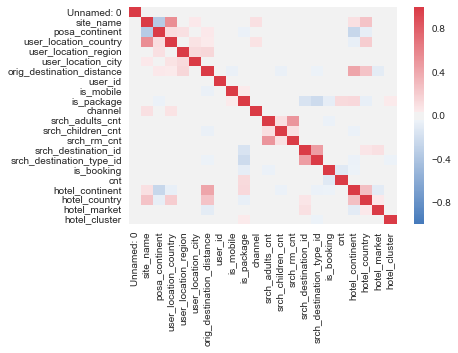

In [282]:
import seaborn as sns
cmap = sns.diverging_palette(250, 10, as_cmap=True)
print sns.heatmap(correlations, cmap=cmap)
#not surprisingly, highest correlations are betweeen user country & continent and name of the domain...
#I distrust correlations between orig_destination_distance (the variable with the most NaN) and hotel continent: most likely means that distances to a continent in particular could not be calculated 
#Seems like there's not much correlation among the features!

### What about correlation with the outcome?

Let's plot some of the features vs the target: 

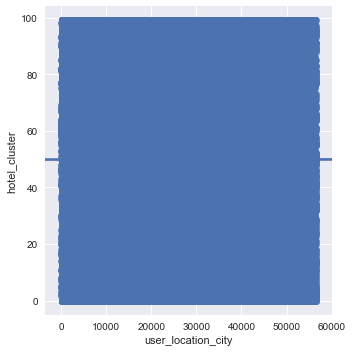

In [287]:
sns.lmplot('user_location_city','hotel_cluster', sample)

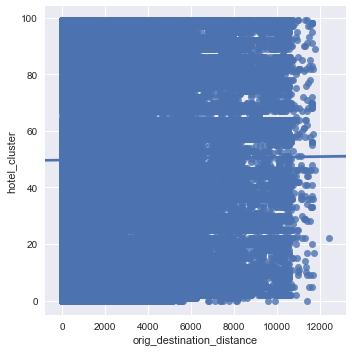

In [288]:
sns.lmplot('orig_destination_distance','hotel_cluster', sample)

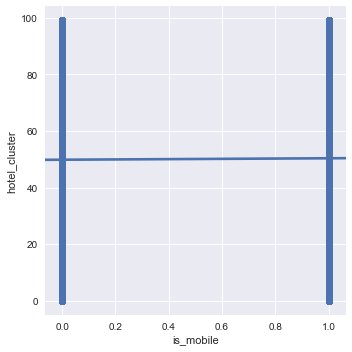

In [289]:
sns.lmplot('is_mobile','hotel_cluster', sample)

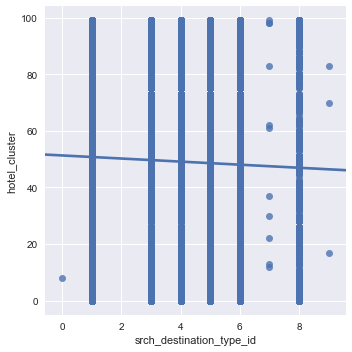

In [290]:
sns.lmplot('srch_destination_type_id','hotel_cluster', sample)

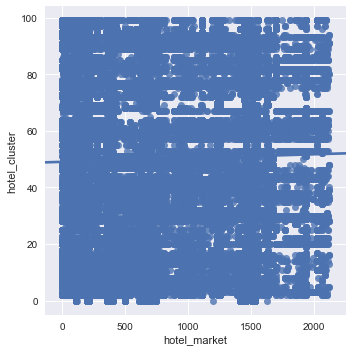

In [291]:
sns.lmplot('hotel_market','hotel_cluster', sample)

These plots don't make much sense, which is to be expected, since most features are discrete categories, and the target has as 100 values, with similar frequencies.

In [295]:
#finally, let's save the work:
sample.to_csv(EXPEDIA_FOLDER + "sampled_df_" + datetime.now().strftime("%Y-%m-%d-%H-%M-%S") + ".csv")

# Summing up:

Returning to my data: which features am I interested in? Which ones should I pay most attention moving forward?

**My outcome: hotel_cluster**

Features I think will help classifying the users:

- is_package 
- user_location_country / user_location_region / user_location_city : all three should point to a similar thing, yet they are not correlated!. Is there one which will work best as a predictor? 
- constructed variable stay_lenght (srch_co - srch_ci)
- srch_adults_cnt
- srch_children_cnt (will transform it to a dummy: with_children)
- srch_room_cnt
- srch_destination_type_id
- hotel_continent / hotel_country /hotel_market: similarly to user location, all three point to a similar thing, yet they show no correlation.

I assume all other variables shold not be that helpfull in predicting the outcome, yet, who knows? Maybe mobile users have their own type of holiday preference (Millennials... 😪)

## Next steps: Modeling.

- Encode the categorical variables (map strings to numbers)
- Standarize (Use sklearn Standarization features).
- Create new variables (dummys, calculations between variables)
- make a train-test split using the sklearn functinoality
- fit Decision tree.
- fit a RandomForestClassifier with all the default values.
- Get model accuracy and choose the best model.
